# This is the PySD version of the food scarcity training model

By Matt Stammers

Version 1 of the food scarcity training model

The PySD framework is definitely the easiest to use but it might not be as intuitive to new users 

In [15]:
# Firstly import the packages

import pysd
from IPython.display import Image
import matplotlib.pyplot as plt
model = pysd.read_xmile('Test_Model2Food.stmx')

## This is the model we are re-creating

The model is very simple apart from the death rate which depends on the other variables.

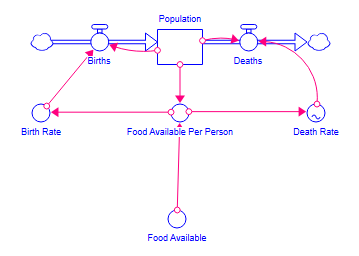

In [17]:
Image('Food_Model.png')

I previously programmed this out using ASDM and BPTK- the code is as below and makes what is going on more concrete when combined with the above:

```python
        #stocks
        'population'          : lambda t: ( (max([0 , 80000000.0])) if ( t  <=  self.starttime ) else (self.memoize('population',t-self.dt) + self.dt * ( self.memoize('births',t-self.dt) - ( self.memoize('deaths',t-self.dt) ) )) ),
        
    
        # Flows
        'births'             : lambda t: max([0 , self.memoize('birthRate', t) * self.memoize('population', t)]),
        'deaths'             : lambda t: max([0 , self.memoize('deathRate', t) * self.memoize('population', t)]),
        
    
        # converters
        'birthRate'      : lambda t: self.memoize('foodAvailablePerPerson', t) * 0.01,
        'foodAvailable'      : lambda t: 100000000.0,
        'foodAvailablePerPerson'      : lambda t: self.memoize('foodAvailable', t) / self.memoize('population', t),
        
    
        # gf
        'deathRate' : lambda t: LERP( self.memoize('foodAvailablePerPerson', t), self.points['deathRate']),
        
    
```

In [18]:
# Here we plot the values in the model. You can see that the popluation is gradually getting smaller due to shortage of food

values = model.run()
values.head(12)

,INITIAL TIME,FINAL TIME,TIME STEP,SAVEPER,Births,Deaths,Food Available Per Person,Birth Rate,Death Rate,Food Available,Population
1.00,1,13,0.25,0.25,1000000.0,1.331600e+07,1.250000,0.012500,0.166450,100000000,8.000000e+07
1.25,1,13,0.25,0.25,1000000.0,1.165272e+07,1.300035,0.013000,0.151490,100000000,7.692100e+07
1.50,1,13,0.25,0.25,1000000.0,1.021407e+07,1.346660,0.013467,0.137549,100000000,7.425782e+07
1.75,1,13,0.25,0.25,1000000.0,8.969713e+06,1.389771,0.013898,0.124658,100000000,7.195430e+07
2.00,1,13,0.25,0.25,1000000.0,8.095867e+06,1.429350,0.014293,0.115718,100000000,6.996187e+07
2.25,1,13,0.25,0.25,1000000.0,7.382448e+06,1.466536,0.014665,0.108266,100000000,6.818791e+07
2.50,1,13,0.25,0.25,1000000.0,6.740757e+06,1.501675,0.015017,0.101224,100000000,6.659229e+07
2.75,1,13,0.25,0.25,1000000.0,6.163581e+06,1.534752,0.015348,0.094596,100000000,6.515710e+07
3.00,1,13,0.25,0.25,1000000.0,5.644435e+06,1.565773,0.015658,0.088379,100000000,6.386621e+07
3.25,1,13,0.25,0.25,1000000.0,5.177483e+06,1.594767,0.015948,0.082569,100000000,6.270510e+07


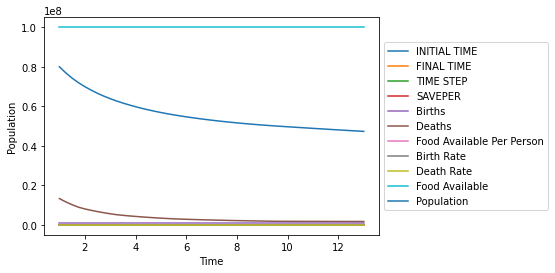

In [19]:
# Then we can plot all the variables of interest using matlplotlib

values.plot()
plt.ylabel('Population')
plt.xlabel('Time')
plt.legend(loc='center left', bbox_to_anchor=(1,.5));

### This is a very simple example of PySD using a very simple model

I will add to this code later on but for now it works which is a good enough start.